In [2]:
from inference_sdk import InferenceHTTPClient
from inference_sdk import InferenceConfiguration
import json
import cv2
import os
from dotenv import load_dotenv
load_dotenv()

input_img = "testdata/isometric/IMG_20240316_100329_589.jpg"


CLIENT = InferenceHTTPClient(
    api_url="https://outline.roboflow.com", api_key=os.environ.get("ROBOFLOW_API_KEY")
)



In [ ]:
#Inference
result = CLIENT.infer(input_img, model_id="bread-segmentation-hfhm8/4")

In [ ]:


img = cv2.imread(input_img)
for pred in result["predictions"]:
    if True or pred["class"] == "bread":
        label = pred["class"]
        x, w, y, h = (
            int(pred["x"]),
            int(pred["width"]),
            int(pred["y"]),
            int(pred["height"]),
        )
        cv2.rectangle(
            img,
            (x - w // 2, y - h // 2),
            (x + w // 2, y + h // 2),
            (255, 0, 255),
            8,
        )
        cv2.putText(
            img,
            label,
            (x, y - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            4,
        )
output_img = "testdata/results/roboflowresult.jpg"
cv2.imwrite(output_img, img)



In [ ]:
jsonresults = "testsbreadcompute/data.json"

with open(jsonresults, "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

In [5]:
jsonresults = "testsbreadcompute/data.json"
with open(jsonresults) as f:
    result = json.load(f)

In [7]:
import supervision as sv
labels = [item["class"] for item in result["predictions"]]
detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
mask_annotator = sv.MaskAnnotator()

image = cv2.imread(input_img)



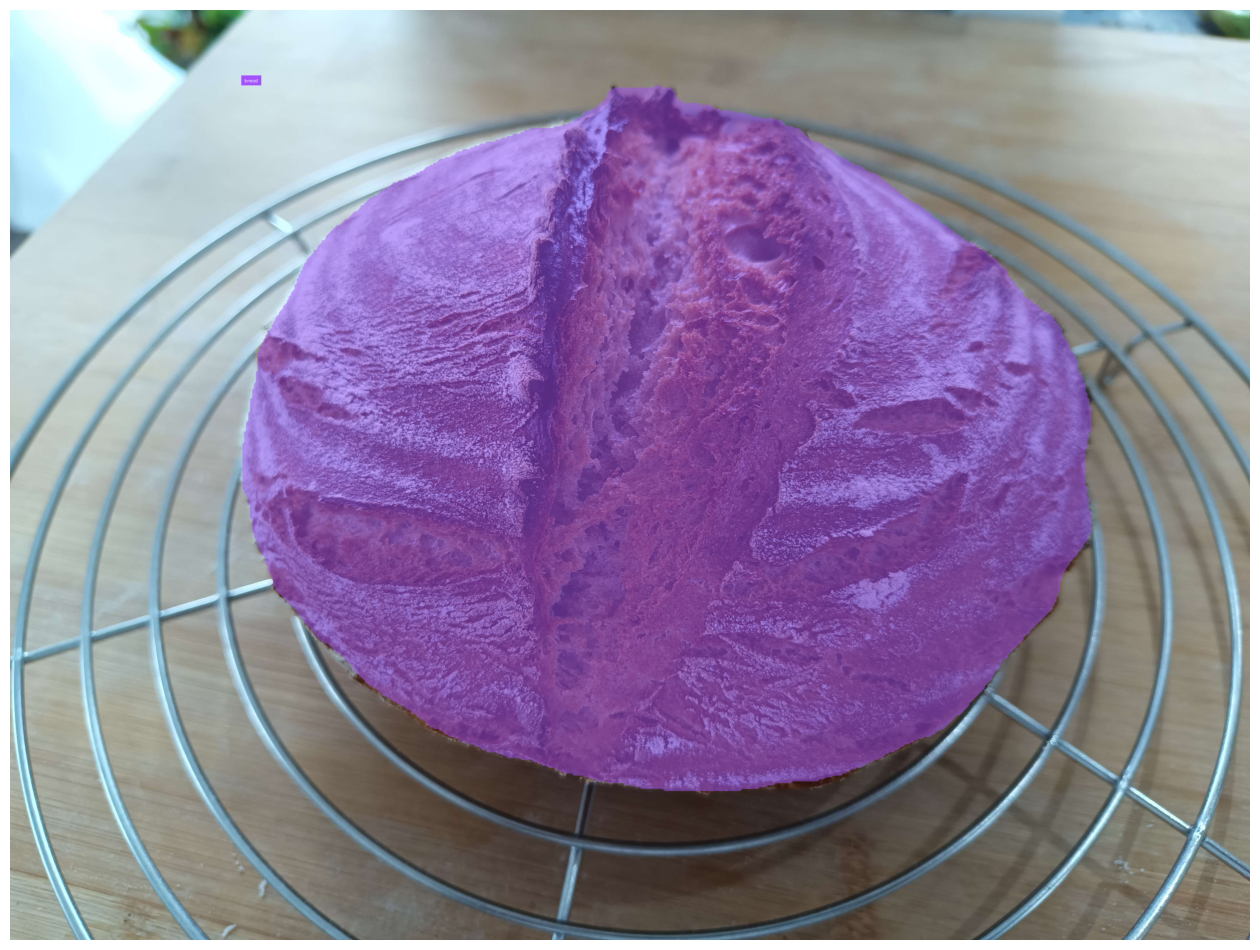

In [8]:
annotated_image = mask_annotator.annotate(
    scene=image, detections=detections)

annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))
sv.save_image(annotated_image, "testdata/results/svresult.png")